In [32]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import geopandas as gpd
import pandas as pd
import seaborn as sns

# Time 2 FS

In [72]:
areas = gpd.read_file(r"C:\Users\olive\Documents\GitHub\MontrealFireSafetyProject\data\LIMADMIN.shp",
                     encoding='latin1')

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


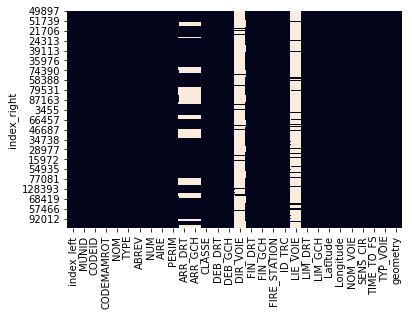

In [73]:
corners = pd.read_csv(r"C:\Users\olive\Documents\GitHub\MontrealFireSafetyProject\data\node_data_time2_cleaned.csv",
                     index_col=0, encoding='latin1')
corners = corners.loc[corners['TIME_TO_FS'] != 1000]
geom = corners.apply(lambda x : Point([x["Longitude"],x["Latitude"]]), axis=1)
corners = gpd.GeoDataFrame(corners, geometry=geom) #geom is a Series
joins = gpd.sjoin(areas, corners, how="right", op="contains")
sns.heatmap(joins.isnull(), cbar=False)

In [85]:
grp = joins.groupby(['NOM']).agg({'TIME_TO_FS': ['mean']})

In [86]:
grp.columns = grp.columns.get_level_values(0)
grp = grp.rename({'TIME_TO_FS': 'Average travel time required to nearest Fire Station (hours)'}, axis=1)
grp.sort_values('Average travel time required to nearest Fire Station (hours)', ascending=False)

,Average travel time required to nearest Fire Station (hours)
NOM,
L'Île-Bizard-Sainte-Geneviève,1.817250
Pierrefonds-Roxboro,0.585997
LaSalle,0.313530
Verdun,0.215166
Dollard-des-Ormeaux,0.117471
Senneville,0.108621
Villeray-Saint-Michel-Parc-Extension,0.054000
Rivière-des-Prairies-Pointe-aux-Trembles,0.044972
Ahuntsic-Cartierville,0.041738


In [97]:
out = pd.merge(grp, areas.set_index(['NOM'], drop=True), left_index=True, right_index=True)

In [103]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(out.drop(['geometry'], axis=1), crs=crs, geometry=out['geometry'])

In [107]:
gdf.reset_index().to_file(r"C:\Users\olive\Documents\GitHub\MontrealFireSafetyProject\data/time2fs.shp")

# Dist 2 FS

C:\Users\olive\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != None)
  "(%s != %s)" % (left_df.crs, right_df.crs)


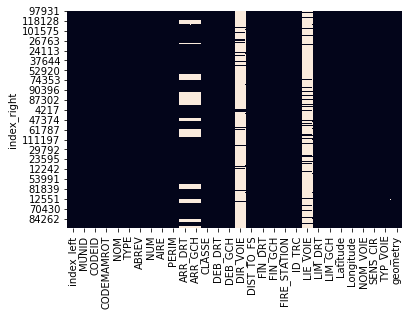

In [108]:
corners = pd.read_csv(r"C:\Users\olive\Documents\GitHub\MontrealFireSafetyProject\data\node_data_cleaned.csv",
                     index_col=0, encoding='latin1')
corners = corners.loc[corners['DIST_TO_FS'] != 1000]
geom = corners.apply(lambda x : Point([x["Longitude"],x["Latitude"]]), axis=1)
corners = gpd.GeoDataFrame(corners, geometry=geom) #geom is a Series
joins = gpd.sjoin(areas, corners, how="right", op="contains")
sns.heatmap(joins.isnull(), cbar=False)

In [109]:
grp = joins.groupby(['NOM']).agg({'DIST_TO_FS': ['mean']})

In [110]:
grp.columns = grp.columns.get_level_values(0)
grp = grp.rename({'DIST_TO_FS': 'Average distance to nearest Fire Station (km)'}, axis=1)
grp.sort_values('Average distance to nearest Fire Station (km)', ascending=False)

,Average distance to nearest Fire Station (km)
NOM,
Senneville,2.333275
Dorval,2.123995
Kirkland,2.110505
Dollard-des-Ormeaux,2.008051
Pointe-Claire,1.992911
Sainte-Anne-de-Bellevue,1.973865
L'Île-Bizard-Sainte-Geneviève,1.918367
Beaconsfield,1.892790
Saint-Laurent,1.887281


In [113]:
out = pd.merge(grp, areas.set_index(['NOM'], drop=True), left_index=True, right_index=True)

In [114]:
crs = {'init': 'epsg:4326'}
gdf = gpd.GeoDataFrame(out.drop(['geometry'], axis=1), crs=crs, geometry=out['geometry'])
gdf.reset_index().to_file(r"C:\Users\olive\Documents\GitHub\MontrealFireSafetyProject\data\dist2fs.shp")